# 3 Preprocessing and Modeling Part 1

## 3.1 Contents<a id='3.1_Contents'></a>

* [3 Preprocessing and Modeling Part 1](#3_Preprocessing_and_Modeling_Part_1)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
    * [3.2.1 Recap Of Data Science Problem](#3.2.1_Recap_Of_Data_Science_Problem)
    * [3.2.2 Introduction to Notebook](#3.2.2_Introduction_to_Notebook)
  * [3.3 Objectives](#3.3_Objectives)
  * [3.4 Imports](#3.4_Imports)
  * [3.5 Load, Subsample, and Preprocess Data](#3.5_Load,_Subsample,_and_Preprocess_Data)
  * [3.6 Train the Naive Bayes Model](#3.6_Train_the_Naive_Bayes_Model)
    * [3.6.1 Set Up the Pipeline and Train](#3.6.1_Set_Up_the_Pipeline_and_Train)
      * [3.6.1.1 Make Predictions](#3.6.1.1_Make_Predictions)
    * [3.6.2 Optimize Model with GridSearchCV](#3.6.2_Optimize_Model_with_GridSearchCV)
      * [3.6.2.1 Make Predictions](#3.6.2.1_Make_Predictions)
  * [3.7 Train the Support Vector Machine Model and Predict](#3.7_Train_the_Support_Vector_Machine_Model_and_Predict)

## 3.2 Introduction<a id='3.2_Introduction'></a>

### 3.2.1 Recap of Data Science Problem<a id='3.2.1_Recap_Of_Data_Science_Problem'></a>

The mission of GlobalGiving is “to transform aid and philanthropy to accelerate community-led change.” To do this, GlobalGiving provides a web-based fundraising platform that supports nonprofits by connecting them with donors and companies. A nonprofit organization can use this platform to pitch their charitable projects on the GlobalGiving website to potential donors. Donors can browse on the website and select from a variety of projects to contribute to. Since 2002, more than 1.1M donors on GlobalGiving have donated more than $530 million to support more than 28,000 projects in 170 countries. 
The nonprofit organizations pitch their development projects by describing the mission and long-term impact of the project in the project description. Based on the nature of the project, GlobalGiving organizes the projects by themes such as education, gender equality, child protection, economic growth, among others. Currently, there are 14,720 active projects organized under 28 different themes. It can be tedious, expensive, and time-consuming to manually assign each project to a theme. Therefore, the goal of this capstone project is to use machine learning to assign a project to a theme.

### 3.2.2 Introduction to Notebook<a id='3.2.2_Introduction_to_Notebook'></a>

In the prior notebook we found that the dataset containing all 38,188 projects with their corresponding texts is too large for my personal computer to handle. Instead of using all 38,188 projects, I decided to subsample 10,000 projects. However, I still had an imbalanced dataset. When fitting the model, the majority of projects were incorrectly classified under "Education", reducing the accuracy of the model. Some projects with similar themes were also misclassified. For example, 71% of mental health projects were classified under physical health, and 75% of ecosystem restoration projects were classified under climate action. Therefore, in this notebook I will only use projects under the themes 'Education', 'Economic Growth', 'Physical Health', and 'Gender Equality'. I will subsample 2500 projects from each theme, I will preprocess the texts using the TF-IDF vectorizer, and I will use this data to train a Naive Bayes and a Support Vector Machine (SVM) model.

## 3.3 Objectives<a id='3.3_Objectives'></a>

1. Subsample 2500 projects from the 'Education', 'Gender Equality', 'Economic Growth', and 'Physical Health' themes
2. Preprocess the data using the TF-IDF vectorizer
3. Train a Naive Bayes and Support Vector Machine model
4. Optimize the models using GridSearchCV

## 3.4 Imports<a id='3.4_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from mlxtend.preprocessing import DenseTransformer
import math

## 3.5 Load, Subsample, and Preprocess Data<a id='3.5_Load,_Subsample,_and_Preprocess_Data'></a>

In [2]:
# the supplied CSV data files are in the data/raw directory
#load data
df = pd.read_csv('../data/raw/data3.csv')

# drop unnecessary columns
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df.head()

,project_id,active,language,text,theme
0,22244,False,en,save life street dog afghanistan street dog th...,Animal Welfare
1,30154,False,en,save street dog death afghanistan dog thousand...,Animal Welfare
2,33084,False,en,save canine human live afghanistan rabies dead...,Animal Welfare
3,35906,False,en,green tanzania green tanzania project design h...,Animal Welfare
4,41112,False,en,help nowzad reduce rabies afghanistan rabies p...,Animal Welfare


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38188 entries, 0 to 38187
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   project_id  38188 non-null  int64 
 1   active      38188 non-null  bool  
 2   language    38188 non-null  object
 3   text        38188 non-null  object
 4   theme       38188 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 1.2+ MB


**<font color='teal'>From the dataset, select those frmo the 'Education', 'Physical Health', 'Gender Equality', and 'Economic Growth' themes.</font>**

In [5]:
df = df.loc[df['theme'].isin(['Education', 'Physical Health', 'Gender Equality', 'Economic Growth'])]

**<font color='teal'>Select 2500 projects from each theme. This subsample will be used for training and testing.</font>**

In [6]:
select_themes = list(df.theme.unique())
list_of_rows = []

for theme in select_themes:
    np.random.seed(1)
    rows = list(np.random.choice(df[df['theme'] == theme].index.values, 2500))
    list_of_rows = list_of_rows + rows

array_of_rows = np.array(list_of_rows)
df = df.loc[array_of_rows]

In [7]:
df

,project_id,active,language,text,theme
8368,1501,False,en,lifeskills beekeeping train girl kenya help gi...,Economic Growth
7542,16217,False,en,hope soil project aim use agriculture mean fig...,Economic Growth
8403,50346,False,en,support kenyan youth sustainable livelihood pr...,Economic Growth
8212,24438,False,en,provide bag make skill marginalize girl twenty...,Economic Growth
10070,31077,False,en,care leaver christmas please close gap congrat...,Economic Growth
...,...,...,...,...,...
31070,47911,False,en,help u save dad nearly men die prostate cancer...,Physical Health
28326,48395,False,en,improve nursing midwifery care liberia urgent ...,Physical Health
26652,3926,False,en,equip midwife remote congolese village woman k...,Physical Health
28744,14408,False,en,keep infant warm heart surgery surgeon hope fo...,Physical Health


In [8]:
df['theme'].value_counts()

Economic Growth    2500
Education          2500
Gender Equality    2500
Physical Health    2500
Name: theme, dtype: int64

**<font color='teal'>First, I will do a demonstration of splitting the data into training and testing sets. Then I will use the TF-IDF and 'bag-of-words' vectorizers to transform the text into vectors.</font>**

In [9]:
X = df['text']
y = df['theme']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=47)

In [11]:
X_train

23826    help u raise aid tarahumara year combination d...
25848    prevent cancer woman quang ninh vietnam woman ...
25366    digital literacy girl kampala slum girl live s...
27960    help mend broken heart kenya project provide d...
22859    empower woman girl auroville bioregion alfred ...
                               ...                        
20105    one day afterschool tutor kid marcus team begi...
27463    fund health technology develop country global ...
22944    fish net give self employment fish fish produc...
9578     rokupa wharf clean sierra leone west africa ro...
21879    support hop mother club bangladesh mother cruc...
Name: text, Length: 7000, dtype: object

**<font color='teal'>Here I will use the 'Bag-of-Words' model, which counts the number of times a word appear in the text.</font>**

In [12]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(X_train)
bw = pd.DataFrame(counts.toarray(),columns=count_vect.get_feature_names())

C:\Users\melis\Envs\topic_classification\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
bw

,aa,aac,aadhya,aae,aaes,aai,aais,aalg,aarabat,aaranyak,...,zuckerberg,zulogu,zulu,zuma,zumat,zwelenthemba,zwelethemba,zyi,zymec,zyuzinsky
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**<font color='teal'>Next, I will take a look at the most common words in all projects categorized under a certain theme.</font>**

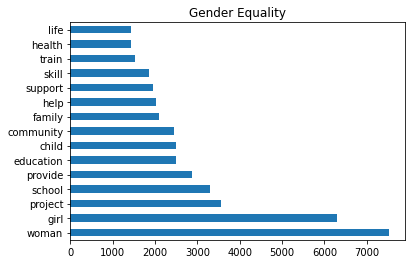

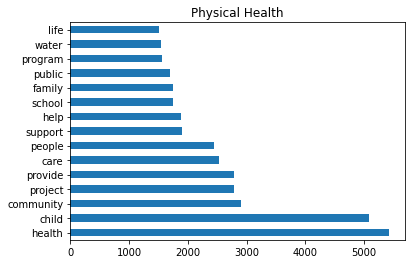

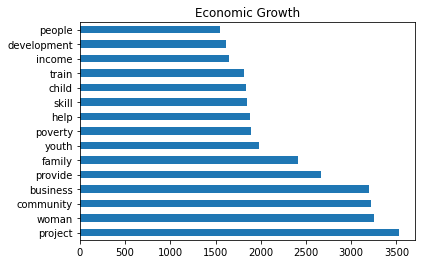

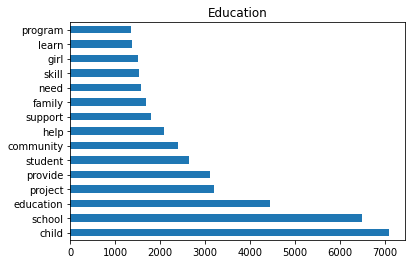

In [14]:
bw['theme'] = list(y_train)
grouped_bw = bw.groupby('theme').sum()
themes = list(y_train.unique())
for theme in themes:
    theme_df = grouped_bw.loc[theme].sort_values(ascending = False)
    most_common_words = grouped_bw.loc[theme].sort_values(ascending = False).index[:15]
    fig, ax = plt.subplots()
    theme_df[most_common_words].plot.barh()
    ax.set_title(theme)
    plt.show()

The four categories have several words in common, such as ‘project’, ‘provide’, ‘help’, ‘child’, ‘community’, and ‘family’.  ‘School’, ‘education’, ‘woman’, and ‘girl’ appear often in ‘Gender Equality’ and ‘Education’ texts which can lead to some texts being misclassified under these themes. ‘Water’ and ‘health’ are most frequent in ‘Physical Health’ and ‘development’ and ‘income’ are most frequent in ‘Economic Growth’ texts.

While the bag-of-words method counts the number of times a word appears in the text, The TF-IDF method takes into account the importance of the word in the document. A word will be less important if it is common and appears in all texts. Therefore, words such as ‘project’, ‘provide’, and help’, which are the most frequent words in all categories, will be assigned a lower importance and a lower TF-IDF value. In this manner, the TF-IDF method helps identify the words that are most important for text classification. For these reasons, I used the TF-IDF method first to convert the text for each project into feature vectors prior to training the Naïve Bayes and SVM models. This resulted in a sparse matrix of 10,000 by 26,677 in size. 

**<font color='teal'>Here I will use the TF-IDF model, which measures the importance of a word in a text by taking the product of the frequency of a term in a single text (term frequency) over its relative rarity in the collection of documents (inverse document frequency).</font>**

In [15]:
vectorizer = TfidfVectorizer(strip_accents = 'ascii', stop_words='english', max_df = 0.50)
#vectorizer = TfidfVectorizer(strip_accents = 'ascii')
trsfm=vectorizer.fit_transform(X_train)
tfidf = pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names())
tfidf

C:\Users\melis\Envs\topic_classification\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aac,aadhya,aae,aaes,aai,aais,aalg,aarabat,...,zuckerberg,zulogu,zulu,zuma,zumat,zwelenthemba,zwelethemba,zyi,zymec,zyuzinsky
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.6 Train the Naive Bayes Model<a id='3.6_Train_the_Naive_Bayes_Model'></a>

### 3.6.1 Set Up the Pipeline and Train<a id='3.6.1_Set_Up_the_Pipeline_and_Train'></a>

**<font color='teal'>Next, I will set up a pipeline that takes the training data and applies the TF-IDF vectorizer, converts the resulting sparse data into a dense numpy array, and train the Naive Bayes model. The performance of the model on the training data is shown in the classification report and the confusion matrix. </font>**

                 precision    recall  f1-score   support

Economic Growth       0.97      1.00      0.98      1739
      Education       1.00      0.95      0.97      1733
Gender Equality       0.96      0.99      0.98      1746
Physical Health       1.00      0.98      0.99      1782

       accuracy                           0.98      7000
      macro avg       0.98      0.98      0.98      7000
   weighted avg       0.98      0.98      0.98      7000



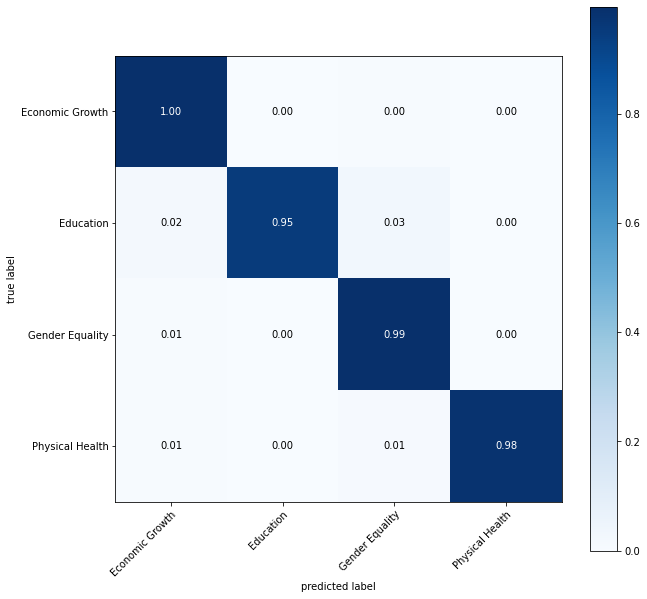

In [90]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df = 0.50)),
    ('dense', DenseTransformer()),
    ('NB', GaussianNB())])

pipe.fit(X_train,y_train)
predicted_NB = pipe.predict(X_train)
print(classification_report(y_train, predicted_NB))
multiclass = confusion_matrix(y_train, predicted_NB)

class_names = pipe.classes_

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names,
                                figsize = (10,10))
plt.show()

#### 3.6.1.1 Make Predictions<a id='3.6.1.1_Make_Predictions'></a>

**<font color='teal'>Next, I will look at the performance of the model on the testing dataset, which is shown in the classification report and the confusion matrix. These results show that the Naïve Bayes model is overfitting the training dataset. The average accuracy for the testing dataset is 0.68, which is 0.3 lower than that for the training dataset. </font>**

                 precision    recall  f1-score   support

Economic Growth       0.70      0.73      0.72       761
      Education       0.67      0.56      0.61       767
Gender Equality       0.64      0.71      0.68       754
Physical Health       0.70      0.70      0.70       718

       accuracy                           0.68      3000
      macro avg       0.68      0.68      0.68      3000
   weighted avg       0.68      0.68      0.68      3000



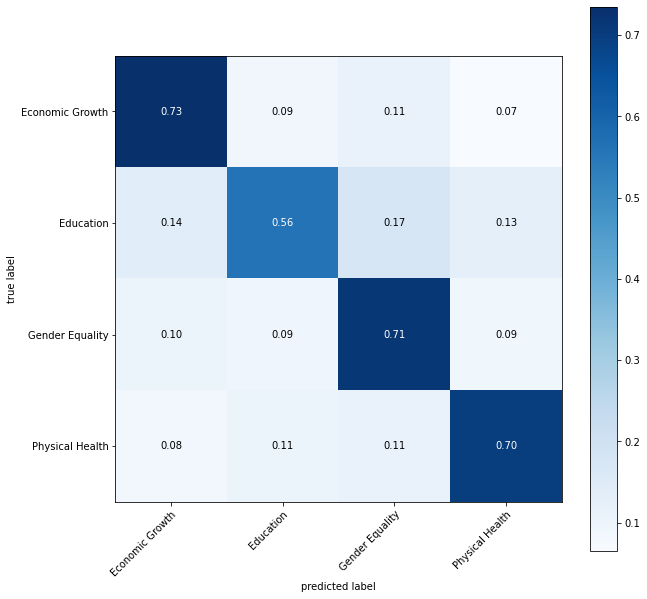

In [91]:
predicted_NB = pipe.predict(X_test)
print(classification_report(y_test, predicted_NB))

multiclass = confusion_matrix(y_test, predicted_NB)

class_names = pipe.classes_

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names,
                                figsize = (10,10))
plt.show()

**<font color='teal'>Here I use cross-validation to further assess the performance of the model. We find that the accuracy varies from 0.60 to 0.64. </font>**

In [92]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring ='accuracy')
cv_scores = cv_results['test_score']
cv_scores

array([0.60785714, 0.61071429, 0.59714286, 0.64142857, 0.63357143])

### 3.6.2 Optimize Model with GridSearchCV<a id='3.6.2_Optimize_Model_with_GridSearchCV'></a>

**<font color='teal'>To optimize the Naïve Bayes model, I used GridSearchCV to tune the variance smoothing parameter of the Gaussian Naïve Bayes algorithm.</font>**

In [93]:
parameters = {
    'NB__var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
clf_cv = GridSearchCV(pipe, cv = 5, param_grid = parameters, verbose = 1, n_jobs=-1, scoring ='accuracy')
clf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_df=0.5,
                                                        stop_words='english')),
                                       ('dense', DenseTransformer()),
                                       ('NB', GaussianNB())]),
             n_jobs=-1,
             param_grid={'NB__var_smoothing': [0.01, 0.001, 0.0001, 1e-05,
                                               1e-06, 1e-07, 1e-08, 1e-09,
                                               1e-10, 1e-11, 1e-12, 1e-13,
                                               1e-14, 1e-15]},
             scoring='accuracy', verbose=1)

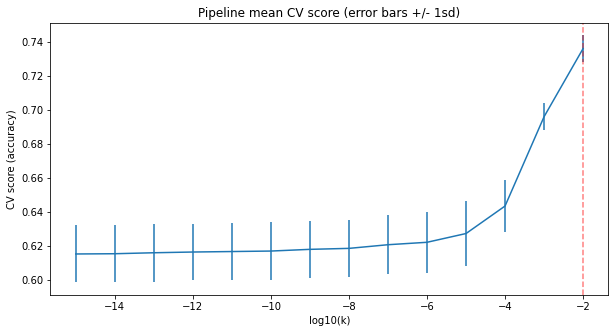

In [94]:
score_mean = clf_cv.cv_results_['mean_test_score']
score_std = clf_cv.cv_results_['std_test_score']
cv_k = [math.log10(k) for k in clf_cv.cv_results_['param_NB__var_smoothing']]
best_k = math.log10(clf_cv.best_params_['NB__var_smoothing'])
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('log10(k)')
plt.ylabel('CV score (accuracy)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

**<font color='teal'>Here we see that the accuracy is improved by 12% when the variance smoothing parameter is increased from the default value of 10^(-9) to 10^(-2).</font>**

#### 3.6.2.1 Make Predictions<a id='3.6.2.1_Make_Predictions'></a>

**<font color='teal'>Below I assess the performance of the optimized Naive Bayes model on the training and testing datasets using the classification report and the confusion matrix.</font>**

                 precision    recall  f1-score   support

Economic Growth       0.93      0.94      0.94      1739
      Education       0.97      0.88      0.92      1733
Gender Equality       0.89      0.93      0.91      1746
Physical Health       0.91      0.95      0.93      1782

       accuracy                           0.92      7000
      macro avg       0.93      0.92      0.92      7000
   weighted avg       0.93      0.92      0.92      7000



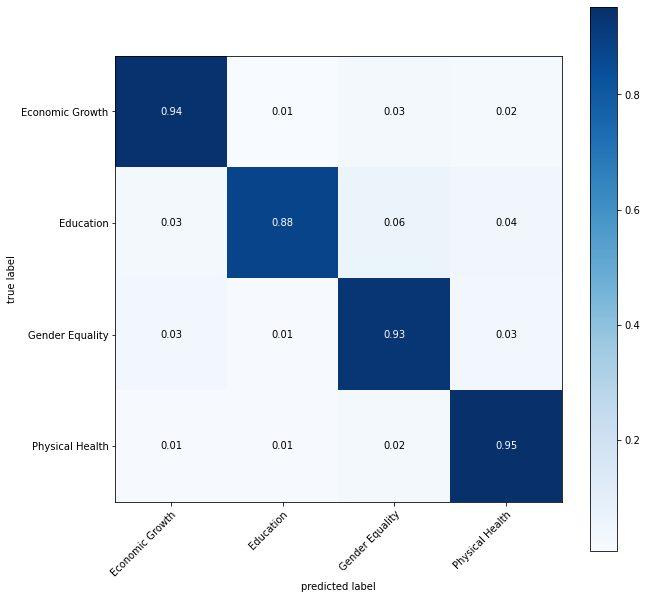

In [95]:
predicted_NB = clf_cv.predict(X_train)
print(classification_report(y_train, predicted_NB))

multiclass = confusion_matrix(y_train, predicted_NB)

class_names = clf_cv.classes_

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names,
                                figsize = (10,10))
plt.show()

                 precision    recall  f1-score   support

Economic Growth       0.79      0.78      0.79       761
      Education       0.83      0.62      0.71       767
Gender Equality       0.67      0.79      0.73       754
Physical Health       0.78      0.85      0.81       718

       accuracy                           0.76      3000
      macro avg       0.77      0.76      0.76      3000
   weighted avg       0.77      0.76      0.76      3000



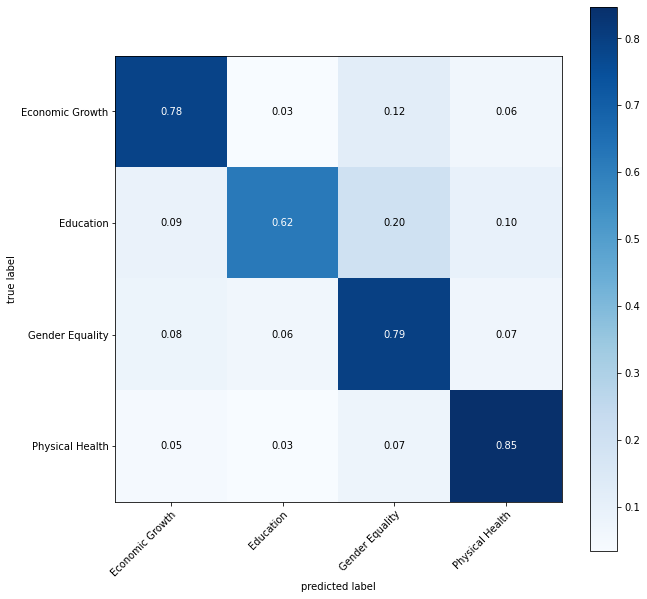

In [96]:
predicted_NB = clf_cv.predict(X_test)
print(classification_report(y_test, predicted_NB))

multiclass = confusion_matrix(y_test, predicted_NB)

class_names = clf_cv.classes_

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names,
                                figsize = (10,10))
plt.show()

**<font color='teal'>When the model is applied on the test set, ‘Education’ projects are misclassified the most, and 20% of them get classified under ‘Gender Equality’. Average accuracy is 0.76, which is 17% less accurate compared to when the model is applied on the training set. This suggests that the Naïve Bayes algorithm is overfitting the training set.</font>**

In [97]:
actual_and_predictions = pd.DataFrame({'text': list(X_test), 'actual': list(y_test), 'predicted': predicted_NB})

In [98]:
actual_and_predictions[(actual_and_predictions['actual'] == 'Education') \
                      & (actual_and_predictions['predicted'] == 'Gender Equality')]

,text,actual,predicted
5,spanish network large latino population morehe...,Education,Gender Equality
35,academic school refugee camp kenya project pro...,Education,Gender Equality
45,provide education wastepicker child project se...,Education,Gender Equality
55,train disadvantage student north nigeria proje...,Education,Gender Equality
62,teach young afghan woman teach afghan girl pro...,Education,Gender Equality
...,...,...,...
2906,give leadership skill secondary student projec...,Education,Gender Equality
2921,upscalling community cambodia kampong cham sma...,Education,Gender Equality
2966,revolutionize high education brazil inturma re...,Education,Gender Equality
2969,replace school earthquake zone bolivia click a...,Education,Gender Equality


## 3.7 Train the Support Vector Machine Model and Predict<a id='3.7_Train_the_Support_Vector_Machine_Model_and_Predict'></a>

**<font color='teal'>While fitting the Naïve Bayes model took about an hour with hyperparameter tuning, fitting a linear SVM model took about 8 hours with no hyperparameter tuning. The confusion matrix below shows he average accuracy for the SVM model is 0.84, which is 8% higher than the optimized Naïve Bayes model previously discussed. The SVM model classifies the ‘Education’ projects better than the Naïve Bayes model by 20%.</font>**

Classification Report for Training Data
                 precision    recall  f1-score   support

Economic Growth       0.95      0.94      0.94      1739
      Education       0.95      0.93      0.94      1733
Gender Equality       0.92      0.94      0.93      1746
Physical Health       0.95      0.96      0.95      1782

       accuracy                           0.94      7000
      macro avg       0.94      0.94      0.94      7000
   weighted avg       0.94      0.94      0.94      7000

Classification Report for Testing Data
                 precision    recall  f1-score   support

Economic Growth       0.85      0.83      0.84       761
      Education       0.84      0.82      0.83       767
Gender Equality       0.83      0.86      0.85       754
Physical Health       0.84      0.86      0.85       718

       accuracy                           0.84      3000
      macro avg       0.84      0.84      0.84      3000
   weighted avg       0.84      0.84      0.84      3000



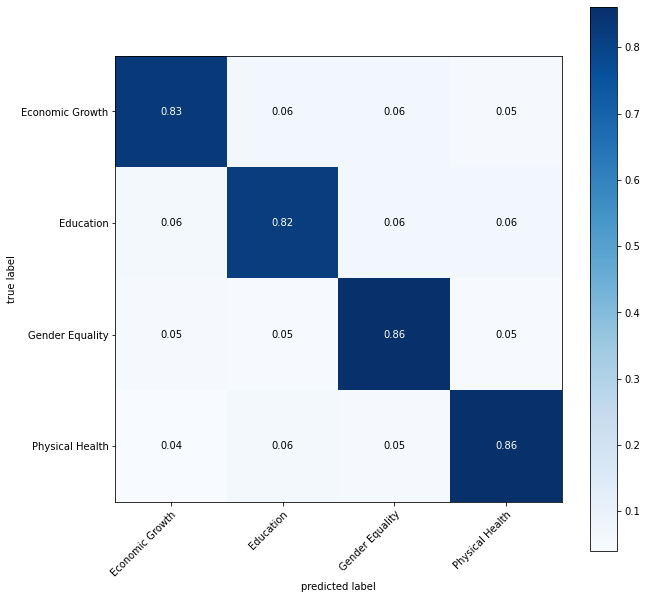

In [99]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(strip_accents = 'ascii', stop_words='english', max_df = 0.50)),
    ('dense', DenseTransformer()),
    ('SVC', SVC(kernel='linear'))])

pipe.fit(X_train,y_train)
predicted_svc = pipe.predict(X_train)
print('Classification Report for Training Data')
print(classification_report(y_train, predicted_svc))

predicted_svc = pipe.predict(X_test)
print('Classification Report for Testing Data')
print(classification_report(y_test, predicted_svc))

multiclass = confusion_matrix(y_test, predicted_svc)

class_names = pipe.classes_

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names,
                                figsize = (10,10))
plt.show()

**<font color='teal'>Here I use cross-validation to further assess the performance of the model. We find that the accuracy varies from... </font>**

In [ ]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df = 0.50)),
    ('dense', DenseTransformer()),
    ('SVC', SVC(kernel='linear'))])

cv_results = cross_validate(pipe, X_train, y_train, cv=3, scoring ='accuracy')
cv_scores = cv_results['test_score']
cv_scores

**<font color='teal'>While both Bag-of-Words and TF-IDF are the most popular word-embedding methods, there a number of drawbacks: (1) They don't capture the context of the words and their similarity, (2) if the new sentences contain new words, then our vocabulary size would increase and thereby, the length of the vectors would increase too, making the dataset very sparse. This affects the efficiency of the training. To improve the efficiency of the model and better capture the context of words and their similarity, in the next notebook I will use the word2vec word-embedding method, which allows me to choose the size of the word vector.</font>**